<a href="https://colab.research.google.com/github/vegansam/AI4CCEE_Fall_2024/blob/main/SamGood_Lecture3_Activity6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Import the Pandas library and any other necessary libraries (like Matplotlib)
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [24]:
#Load a sample dataset into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/235-Nov.csv')

In [25]:
#Inspect the first few rows
df.head()

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,small-class-count,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,month,day
0,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB EN,OK,1,...,0,0,0,OpenTMS-Detector46573-0,w,unknown,60,ON_RAMP,11,10
1,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RL,OK,4,...,0,1,0,OpenTMS-Detector46573-1,w,unknown,60,NORMAL,11,10
2,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RCL,OK,3,...,0,0,0,OpenTMS-Detector46573-2,w,unknown,60,NORMAL,11,10
3,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LCL,OK,2,...,0,0,0,OpenTMS-Detector46573-3,w,unknown,60,NORMAL,11,10
4,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-4,w,unknown,60,NORMAL,11,10


In [31]:
#Preprocess the time column to convert from HHMMSS format to hours,
#and convert the date column to datetime format
df['time'] = df['time'].replace('0', '000000')
df['time'] = pd.to_datetime(df['time'], format='%H%M%S', errors='coerce')
df['time'] = df['time'].dt.hour

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')


In [32]:
#Use loops to calculate and print the average lane occupancy
#for each unique date

unique_dates = df['date'].unique()

for date in unique_dates:
  # Filter data for the current date
  date_data = df[df['date'] == date]

  # Calculate the total lane occupancy for the current date
  total_occupancy = sum(date_data['lane-occupancy'])

  # Calculate the average lane occupancy for the current date
  average_occupancy = total_occupancy / len(date_data)

  # Print the average lane occupancy for the current date
  print(f"Average lane occupancy for {date}: {average_occupancy}")

Average lane occupancy for 2021-11-10 00:00:00: 4.478697674418605
Average lane occupancy for 2021-11-02 00:00:00: 4.229873193748157
Average lane occupancy for 2021-11-08 00:00:00: 4.288217149907465
Average lane occupancy for 2021-11-11 00:00:00: 2.362357414448669
Average lane occupancy for 2021-11-03 00:00:00: 1.8052338530066816
Average lane occupancy for 2021-11-09 00:00:00: 1.9666355140186915


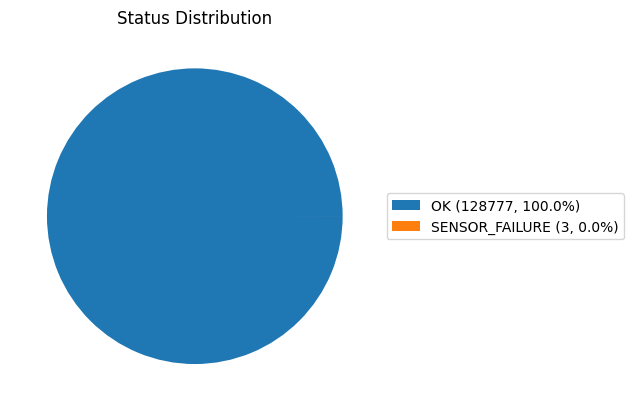

In [38]:
#visualize the total lane counts based on status,
#create a pie chart

# Count occurrences of each status
status_counts = df['status'].value_counts()

# Create a pie chart
plt.pie(status_counts, labels=None)
plt.title('Status Distribution')

# Create labels with counts and percentages
labels = [f'{index} ({count}, {count/sum(status_counts)*100:.1f}%)' for index, count in status_counts.items()]
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

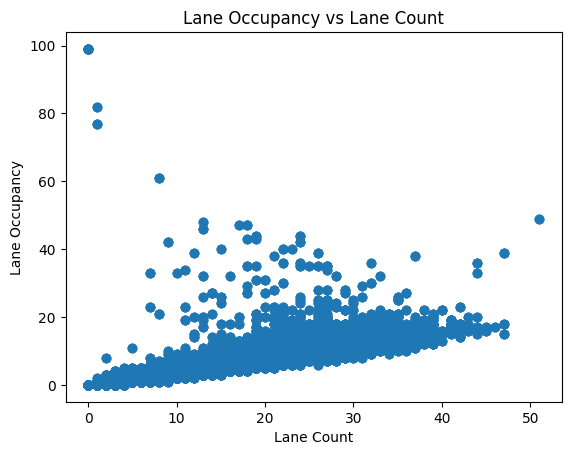

In [36]:
#Create a Scatter Plot of Lane Occupancy vs Lane Count

plt.scatter(df['lane-count'], df['lane-occupancy'])
plt.xlabel('Lane Count')
plt.ylabel('Lane Occupancy')
plt.title('Lane Occupancy vs Lane Count')
plt.show()